<a href="https://colab.research.google.com/github/Samanga06/digit_recog/blob/main/digit_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
(x_train,y_train ),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train/225.0
x_test = x_test/225.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


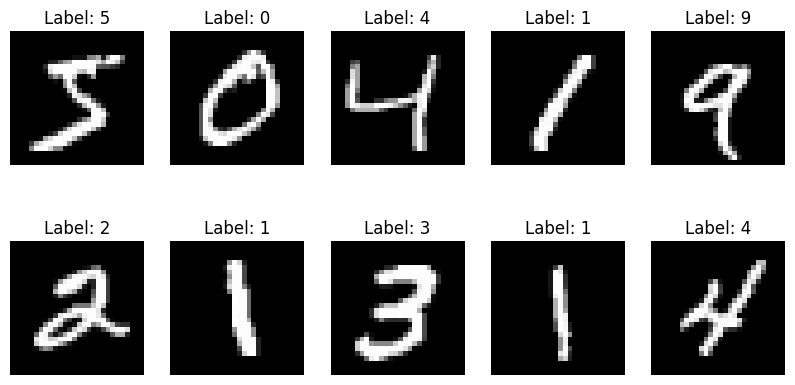

In [6]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [16]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation = "relu"),
    layers.Dense(32,activation = "relu"),
    layers.Dense(10,activation = "softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer = "adam",
               loss = "sparse_categorical_crossentropy",
               metrics=['accuracy'])

model.fit(x_train,y_train, epochs=6,validation_split=0.1)

Epoch 1/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8613 - loss: 0.4574 - val_accuracy: 0.9720 - val_loss: 0.0960
Epoch 2/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9664 - loss: 0.1106 - val_accuracy: 0.9760 - val_loss: 0.0850
Epoch 3/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9784 - loss: 0.0711 - val_accuracy: 0.9773 - val_loss: 0.0834
Epoch 4/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9819 - loss: 0.0571 - val_accuracy: 0.9762 - val_loss: 0.0827
Epoch 5/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9856 - loss: 0.0443 - val_accuracy: 0.9795 - val_loss: 0.0809
Epoch 6/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9890 - loss: 0.0349 - val_accuracy: 0.9788 - val_loss: 0.0808


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test,verbose = 2)
print(f'\nTest Accuracy: {test_acc:.4f}')

313/313 - 1s - 2ms/step - accuracy: 0.9782 - loss: 0.0812

Test Accuracy: 0.9782


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


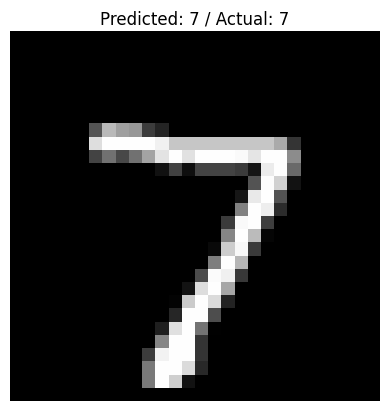

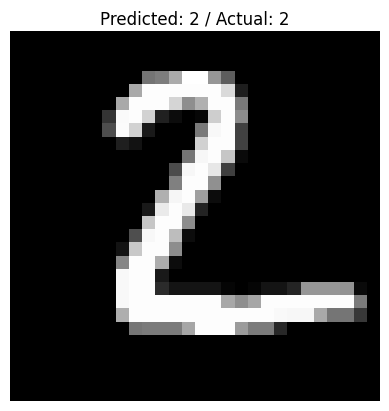

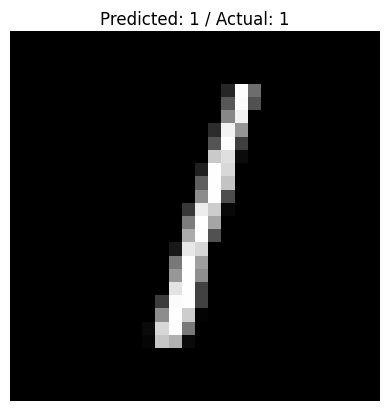

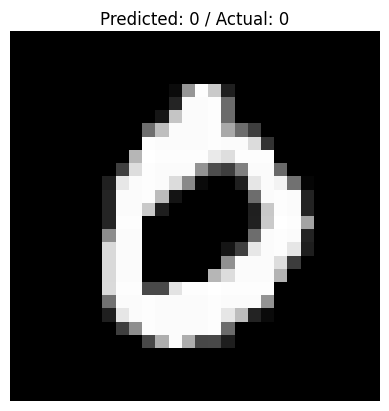

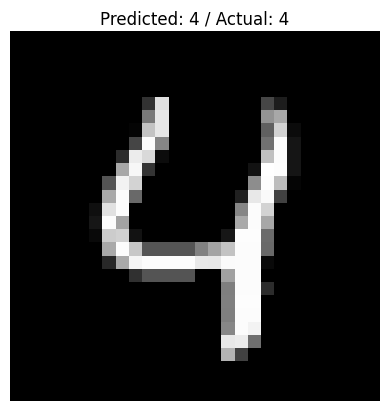

In [19]:
predictions = model.predict(x_test)

# Show first 5 predictions
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} / Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()